In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../pyCudaPolygon"))
import pyCudaPolygon as pcp
import numpy as np
from matplotlib import pyplot as plt

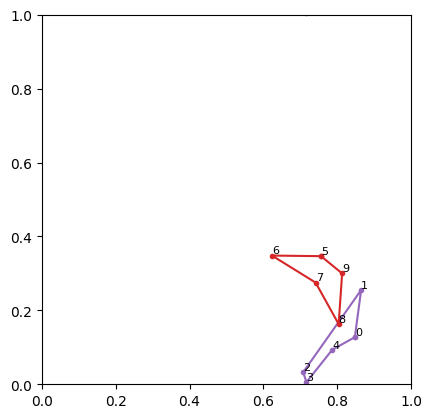

In [2]:
m = pcp.model(size = 10, seed = 1)
m.loadModel("testSaver")
m.draw()

In [3]:
# Anyway, get neighbors:

In [4]:
m.setMaxEdgeLength(0.25)
m.initializeNeighborCells()
m.updateNeighborCells()

In [5]:
m.getNeighborIndices()

array([2, 0, 1, 3, 4, 7, 8, 5, 6, 9])

In [6]:
m.getBoxCounts()

array([ 0,  0,  0,  1,  7,  7,  7,  9, 10, 10, 10, 10, 10, 10, 10, 10])

In [7]:
m.getNeighborCells()

array([2, 3, 3, 3, 3, 3, 3, 6, 6, 7])

In [8]:
# You can see that the neighbor cells updater works fine. Get the neighbors from the neighbor cells

In [9]:
m.updateNeighbors(0.0)

In [10]:
print(m.getNeighbors())

{1: array([7, 8])}


In [11]:
# And we see that it correctly determined the neighbors!

In [12]:
# Synopsis of bug fix--I had one of my signs wrong for the calculation of u. I found it by adding getForces
# prematurely, setting its size to (2 * size * size), and putting u and t into it after passing it into the
# kernel. This let me see that u was being calculated negative of what I expected (but still correctly otherwise).
# After this realization, I checked the calculation again and noticed that indeed there was a sign error. I think
# I made this error the first time I did the calculation, but I left that notebook in Acme so I could be wrong. 
# (Hence why I didn't find this bug earlier.)
# It also seems that you can't call this function too many times or it crashes. I'll investigate that next.
# I suspect it is not properly resetting the neighbors before continuing the calculation. This could be a 
# behavior that is helpful in bug testing the recalculator though.

In [13]:
for i in range(1000):
    m.updateNeighbors(0.0)
m.getNeighbors()

{1: array([7, 8])}

In [14]:
# It's fine updating the neighbors over and over.

In [15]:
# To make sure the pbc's work correctly, move the positions over a bit:

In [16]:
pos = m.getPositions().reshape(m.getNumVertices(), 2)
newPos = (pos - np.mean(pos, axis = 0)) % 1
newPos = newPos.reshape(m.getNumVertices() * 2)
m.setPositions(newPos)

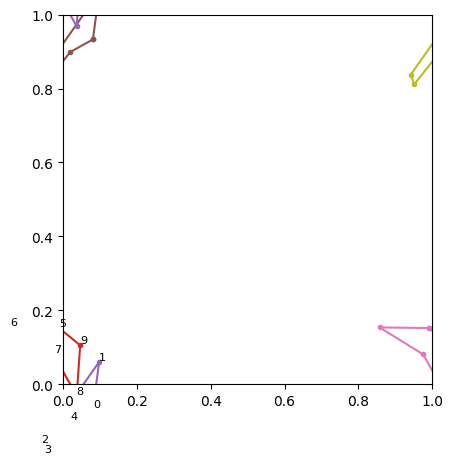

In [17]:
m.draw()
plt.show()

In [18]:
m.updateNeighborCells()
m.updateNeighbors(0.0)
m.getNeighbors()

{1: array([7, 8])}

In [19]:
# Great! It works! Let's reset things to the old positions
m.setPositions(pos.reshape(m.getNumVertices() * 2))

In [20]:
# Now we want to add a little fudge to get neighbors that COULD overlap

In [21]:
m.updateNeighbors(0.5)
m.getNeighbors()

{0: array([2, 3, 5, 6, 7, 9]),
 1: array([3, 5, 6, 4, 7, 8, 9]),
 2: array([5, 6, 4, 8]),
 3: array([5, 6, 7, 8, 9]),
 4: array([5, 6, 7, 8, 9]),
 5: array([7, 8]),
 6: array([8, 9]),
 7: array([9])}

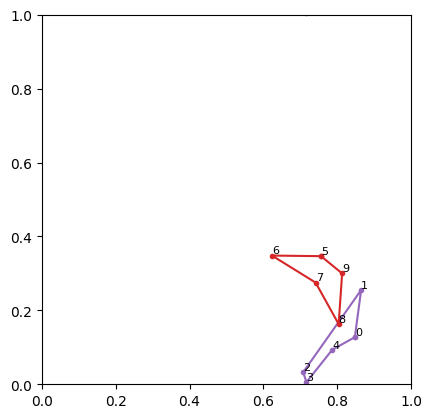

In [22]:
m.draw()
plt.show()

In [23]:
m.updateNeighbors(0.07)
m.getNeighbors()

{0: array([9]),
 1: array([4, 7, 8, 9]),
 3: array([7, 8]),
 4: array([7, 8]),
 5: array([8])}